In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from collections import Counter
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.metrics import confusion_matrix as cm
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import GridSearchCV, KFold

from tensorflow import keras
from keras.layers import Dense
from keras.layers import Dropout
from keras.optimizers import Adam
from tensorflow.keras import layers
from keras.models import Sequential
from keras_tuner.tuners import RandomSearch
from tensorflow.keras.losses import sparse_categorical_crossentropy


import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('gas_turbines.csv')
df

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,111.61,10.400,4.5186,79.559
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,111.78,10.433,4.8470,79.917
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,110.19,10.483,7.9632,90.912
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,110.74,10.533,6.2494,93.227


In [3]:
# Data Exploration
df.isnull().any()

AT      False
AP      False
AH      False
AFDP    False
GTEP    False
TIT     False
TAT     False
TEY     False
CDP     False
CO      False
NOX     False
dtype: bool

In [6]:
df.isnull().sum()


AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TIT     0
TAT     0
TEY     0
CDP     0
CO      0
NOX     0
dtype: int64

In [7]:
#  Descriptive Analysis
df.shape

(15039, 11)

In [8]:
df.dtypes


AT      float64
AP      float64
AH      float64
AFDP    float64
GTEP    float64
TIT     float64
TAT     float64
TEY     float64
CDP     float64
CO      float64
NOX     float64
dtype: object

In [9]:
df.nunique()


AT      12086
AP        540
AH      12637
AFDP    11314
GTEP     8234
TIT       706
TAT      2340
TEY      4207
CDP      3611
CO      13096
NOX     11996
dtype: int64

In [10]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      15039 non-null  float64
 1   AP      15039 non-null  float64
 2   AH      15039 non-null  float64
 3   AFDP    15039 non-null  float64
 4   GTEP    15039 non-null  float64
 5   TIT     15039 non-null  float64
 6   TAT     15039 non-null  float64
 7   TEY     15039 non-null  float64
 8   CDP     15039 non-null  float64
 9   CO      15039 non-null  float64
 10  NOX     15039 non-null  float64
dtypes: float64(11)
memory usage: 1.3 MB


In [11]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
AT,15039.0,17.764381,7.574323,0.522300,11.408000,18.1860,23.8625,34.9290
AP,15039.0,1013.199240,6.410760,985.850000,1008.900000,1012.8000,1016.9000,1034.2000
AH,15039.0,79.124174,13.793439,30.344000,69.750000,82.2660,90.0435,100.2000
AFDP,15039.0,4.200294,0.760197,2.087400,3.723900,4.1862,4.5509,7.6106
GTEP,15039.0,25.419061,4.173916,17.878000,23.294000,25.0820,27.1840,37.4020
TIT,15039.0,1083.798770,16.527806,1000.800000,1079.600000,1088.7000,1096.0000,1100.8000
TAT,15039.0,545.396183,7.866803,512.450000,542.170000,549.8900,550.0600,550.6100
TEY,15039.0,134.188464,15.829717,100.170000,127.985000,133.7800,140.8950,174.6100
CDP,15039.0,12.102353,1.103196,9.904400,11.622000,12.0250,12.5780,15.0810
CO,15039.0,1.972499,2.222206,0.000388,0.858055,1.3902,2.1604,44.1030


In [12]:
df.corr()["TEY"].sort_values(ascending=False)


TEY     1.000000
CDP     0.988473
GTEP    0.977042
TIT     0.891587
AFDP    0.717995
AP      0.146939
NOX    -0.102631
AH     -0.110272
AT     -0.207495
CO     -0.541751
TAT    -0.720356
Name: TEY, dtype: float64

In [13]:
numerical_features = df.describe(include=["int64","float64"]).columns
numerical_features

Index(['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'TEY', 'CDP', 'CO',
       'NOX'],
      dtype='object')

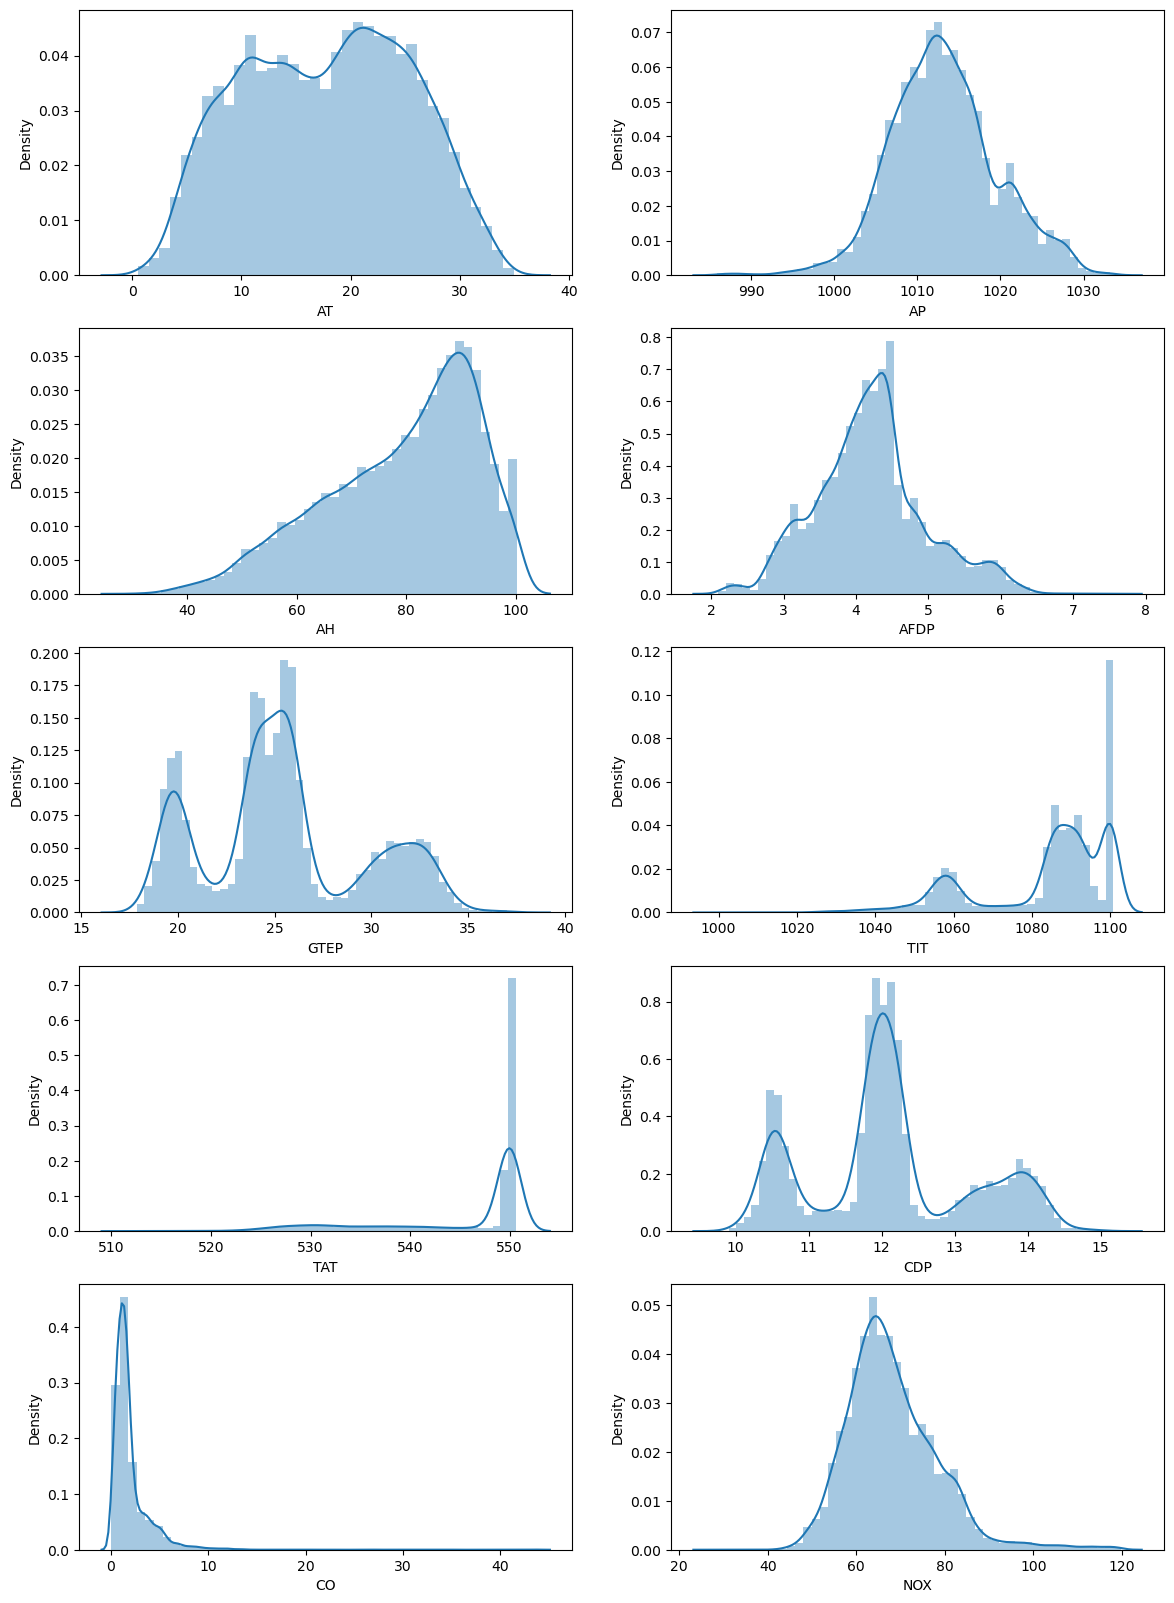

In [14]:
# Data Visualization
#Univariate plots

fig, ax = plt.subplots(5,2, figsize = (14,20))

sns.distplot(df.AT, ax = ax[0,0])
sns.distplot(df.AP, ax = ax[0,1])
sns.distplot(df.AH, ax = ax[1,0])
sns.distplot(df.AFDP, ax = ax[1,1])
sns.distplot(df.GTEP, ax = ax[2,0])
sns.distplot(df.TIT, ax = ax[2,1])
sns.distplot(df.TAT, ax = ax[3,0])
sns.distplot(df.CDP, ax = ax[3,1])
sns.distplot(df.CO, ax = ax[4,0])
sns.distplot(df.NOX, ax = ax[4,1])

plt.show()

In [15]:
#  Outliers Detection
# Detect observations with more than one outlier

def outlier_hunt(df):
    """
    Takes a dataframe df of features and returns a list of the indices
    corresponding to the observations containing more than 2 outliers. 
    """
    outlier_indices = []
    
    for col in df.columns.tolist():         # iterate over features(columns)
        Q1 = np.percentile(df[col],25)      # 1st quartile (25%)
        Q3 = np.percentile(df[col],75)      # 3rd quartile (75%)
        IQR = Q3 - Q1                       # Interquartile rrange (IQR)

        outlier_step = 1.5 * IQR            # outlier step
        
        # Determine a list of indices of outliers for feature col
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step )].index
        
        # Append the found outlier indices for col to the list of outlier indices 
        outlier_indices.extend(outlier_list_col)
        
    # Select observations containing more than 2 outliers
    outlier_indices = Counter(outlier_indices)        
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > 2 )
    
    return multiple_outliers   

print('The dataset contains %d observations with more than 2 outliers' %(len(outlier_hunt(df[numerical_features]))))


The dataset contains 1543 observations with more than 2 outliers


In [16]:
numerical_features


Index(['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'TEY', 'CDP', 'CO',
       'NOX'],
      dtype='object')

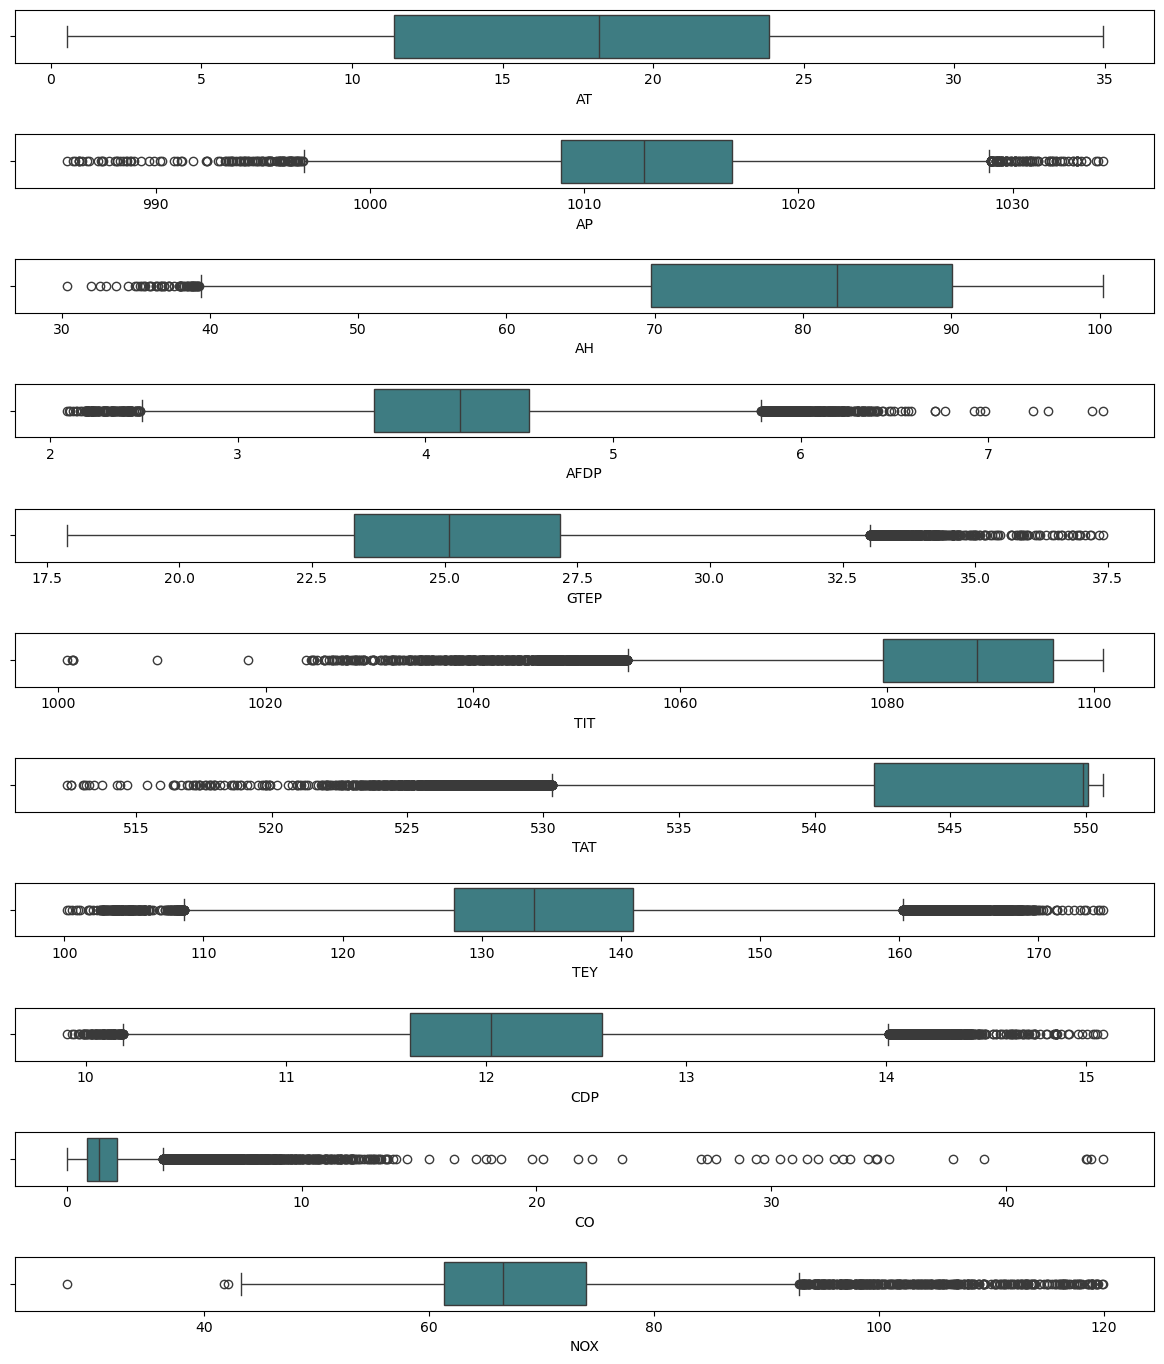

In [17]:
outlier = df.copy() 
fig, axes=plt.subplots(11,1,figsize=(12,14),sharex=False,sharey=False)
sns.boxplot(x='AT',data= outlier,palette='crest',ax=axes[0])
sns.boxplot(x='AP',data= outlier,palette='crest',ax=axes[1])
sns.boxplot(x='AH',data= outlier,palette='crest',ax=axes[2])
sns.boxplot(x='AFDP',data= outlier,palette='crest',ax=axes[3])
sns.boxplot(x='GTEP',data= outlier,palette='crest',ax=axes[4])
sns.boxplot(x='TIT',data= outlier,palette='crest',ax=axes[5])
sns.boxplot(x='TAT',data= outlier,palette='crest',ax=axes[6])
sns.boxplot(x='TEY',data= outlier,palette='crest',ax=axes[7])
sns.boxplot(x='CDP',data= outlier,palette='crest',ax=axes[8])
sns.boxplot(x='CO',data= outlier,palette='crest',ax=axes[9])
sns.boxplot(x='NOX',data= outlier,palette='crest',ax=axes[10])
plt.tight_layout(pad=2.0)

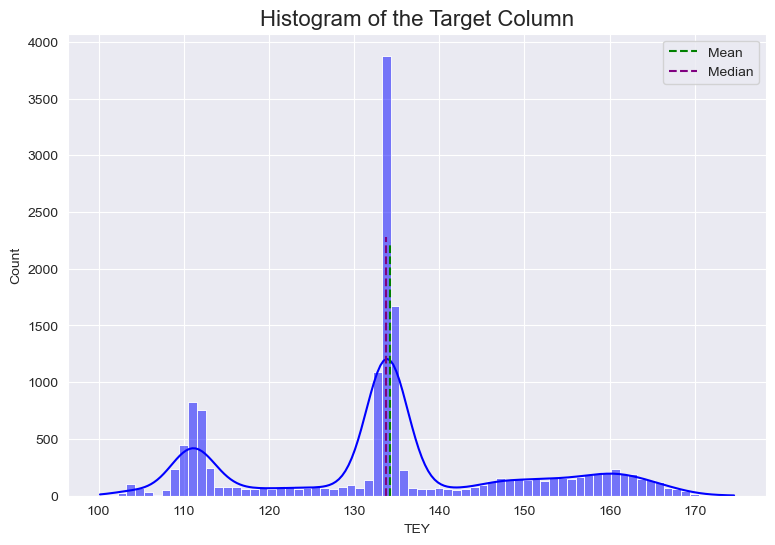

In [18]:
sns.set_style("darkgrid")
plt.figure(figsize=(9,6))
sns.histplot(data= df, x= "TEY", color= "blue", kde= True)
plt.axvline(x=df["TEY"].mean(), ymax= 0.55, color= "green", linestyle= '--', label= "Mean")
plt.axvline(x=df["TEY"].median(), ymax= 0.56, color= "purple", linestyle= '--',label= "Median")
plt.title("Histogram of the Target Column", fontsize=16)
plt.legend();

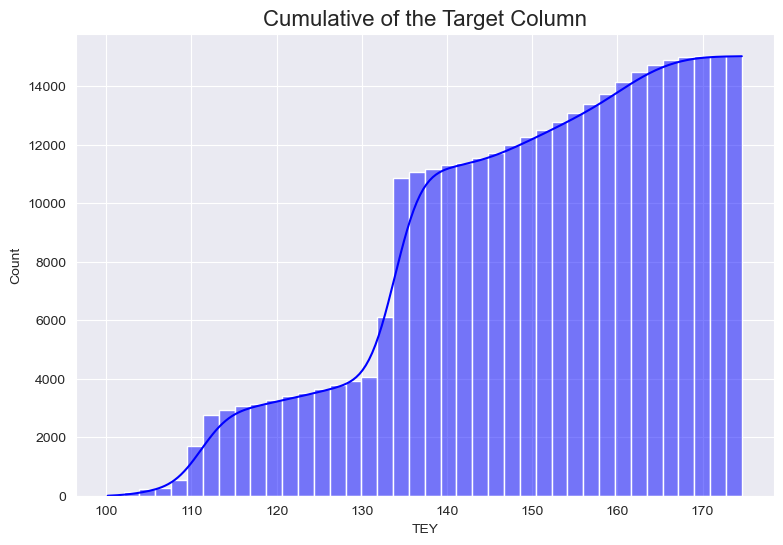

In [19]:
plt.figure(figsize = (9,6))
sns.histplot(df["TEY"], kde= True, bins= 40, color= "blue", cumulative= True)
plt.title("Cumulative of the Target Column", fontsize=16);

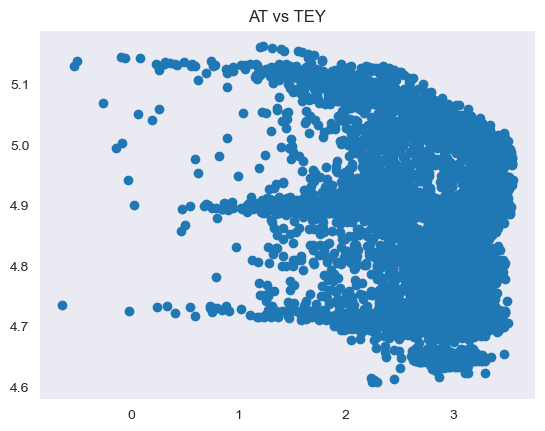

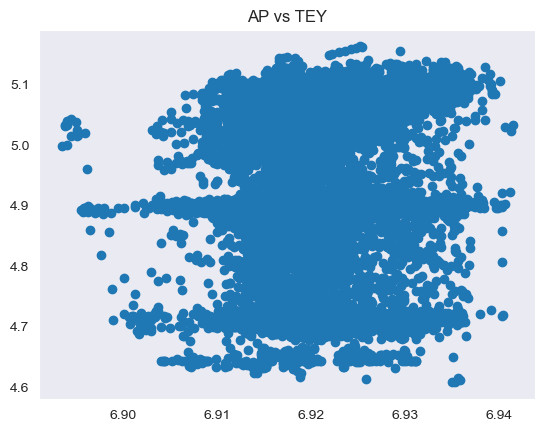

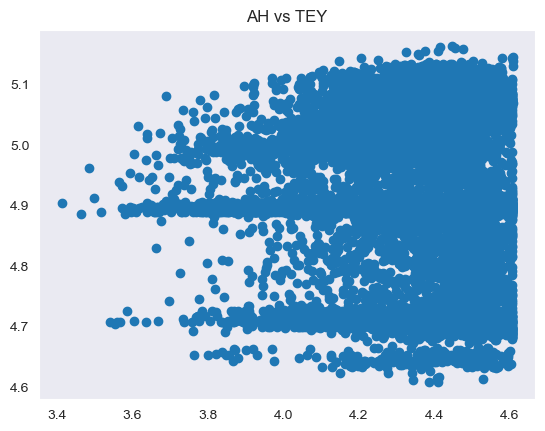

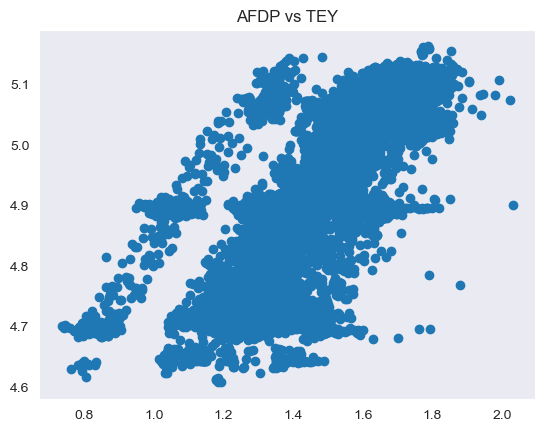

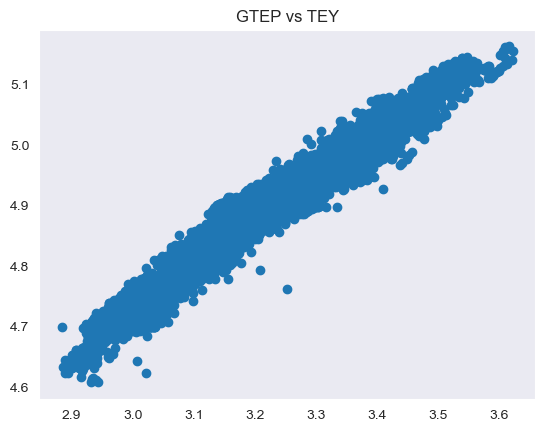

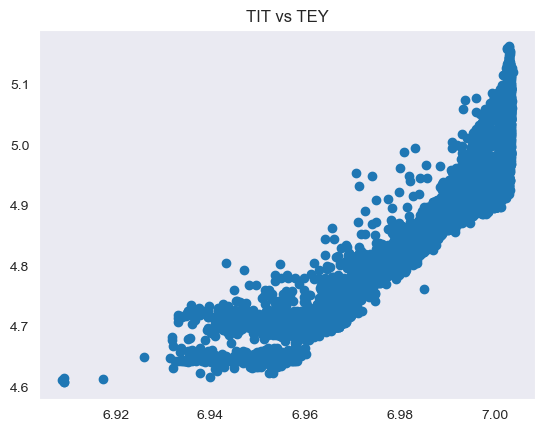

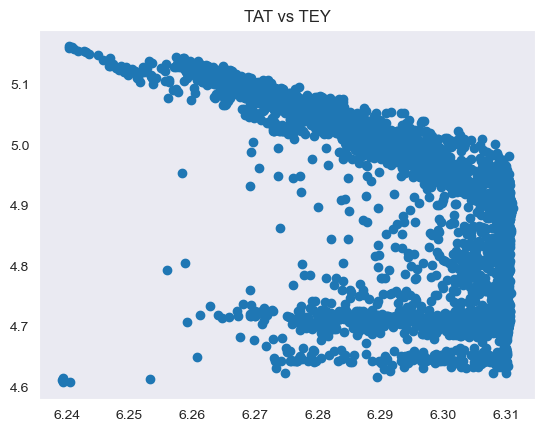

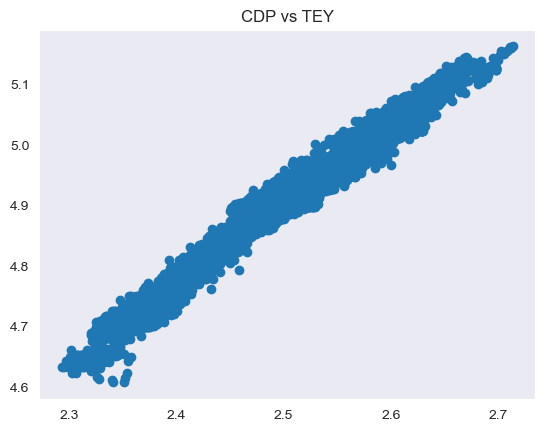

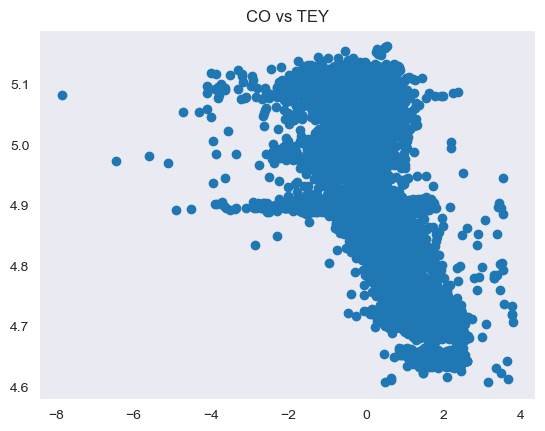

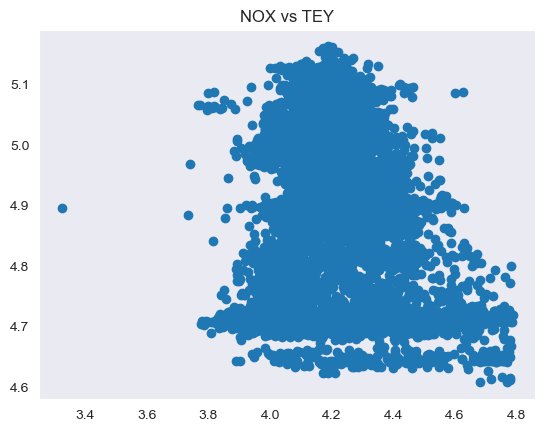

In [23]:
for i in df.columns:
    if i!="TEY":
        plt.scatter(np.log(df[i]), np.log(df['TEY']))
        plt.title(i+ ' vs TEY')
        plt.grid()
        plt.show()

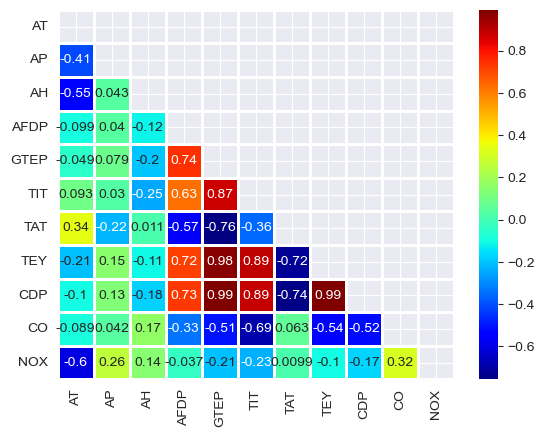

In [24]:
# plt.figure(figsize=(14,12))
mask = np.zeros_like(df.corr(), dtype= np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(data= df.corr(), cmap= "jet", annot= True, linewidths= 1, linecolor= 'white', mask=mask);

In [25]:
x = df.drop('TEY', axis=1)
x

,AT,AP,AH,AFDP,GTEP,TIT,TAT,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,10.400,4.5186,79.559
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,10.433,4.8470,79.917
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,10.483,7.9632,90.912
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,10.533,6.2494,93.227


In [26]:
y = df[["TEY"]]
y

,TEY
0,114.70
1,114.72
2,114.71
3,114.72
4,114.72
...,...
15034,111.61
15035,111.78
15036,110.19
15037,110.74


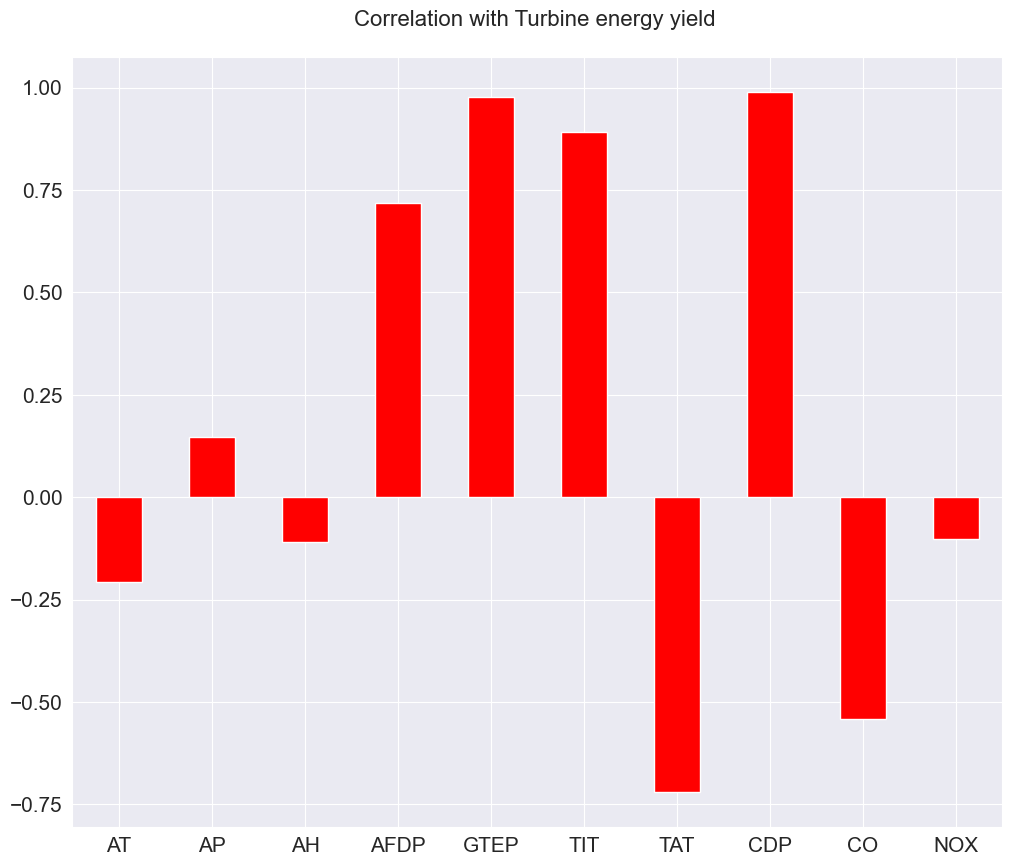

In [27]:
data2 = df.copy()

correlations = data2.corrwith(df.TEY)
correlations = correlations[correlations!=1]
positive_correlations = correlations[correlations>0].sort_values(ascending = False)
negative_correlations = correlations[correlations<0].sort_values(ascending = False)

correlations.plot.bar(figsize=(12,10), fontsize = 15, color = 'red', rot = 0, grid = True)
plt.title('Correlation with Turbine energy yield \n', fontsize = "16", fontfamily = "sans-serif")
plt.show()

In [28]:
# Feature Selection Technique
from numpy import set_printoptions
from sklearn.feature_selection import mutual_info_regression

In [29]:
# Feature Extraction
test = SelectKBest(score_func=mutual_info_regression, k='all')
test

SelectKBest(k='all',
            score_func=<function mutual_info_regression at 0x000002314D46A5C0>)

In [30]:
fit = test.fit(x, y)
fit

SelectKBest(k='all',
            score_func=<function mutual_info_regression at 0x000002314D46A5C0>)

In [31]:
# Summarize Scores
scores = fit.scores_
scores

array([0.41198772, 0.13898553, 0.09781949, 0.66029021, 1.60068366,
       1.32239941, 0.8965572 , 1.7128054 , 0.51300245, 0.30017952])

In [32]:
features = fit.transform(x)
features

array([[   6.8594, 1007.9   ,   96.799 , ...,   10.605 ,    3.1547,
          82.722 ],
       [   6.785 , 1008.4   ,   97.118 , ...,   10.598 ,    3.2363,
          82.776 ],
       [   6.8977, 1008.8   ,   95.939 , ...,   10.601 ,    3.2012,
          82.468 ],
       ...,
       [   7.2647, 1006.3   ,   99.496 , ...,   10.483 ,    7.9632,
          90.912 ],
       [   7.006 , 1006.8   ,   99.008 , ...,   10.533 ,    6.2494,
          93.227 ],
       [   6.9279, 1007.2   ,   97.533 , ...,   10.583 ,    4.9816,
          92.498 ]])

In [33]:
score_df = pd.DataFrame(list(zip(scores, x.columns)), columns =['Score', 'Feature'])
score_df.sort_values(by="Score", ascending=False, inplace=True)
score_df

,Score,Feature
7,1.712805,CDP
4,1.600684,GTEP
5,1.322399,TIT
6,0.896557,TAT
3,0.660290,AFDP
8,0.513002,CO
0,0.411988,AT
9,0.300180,NOX
1,0.138986,AP
2,0.097819,AH


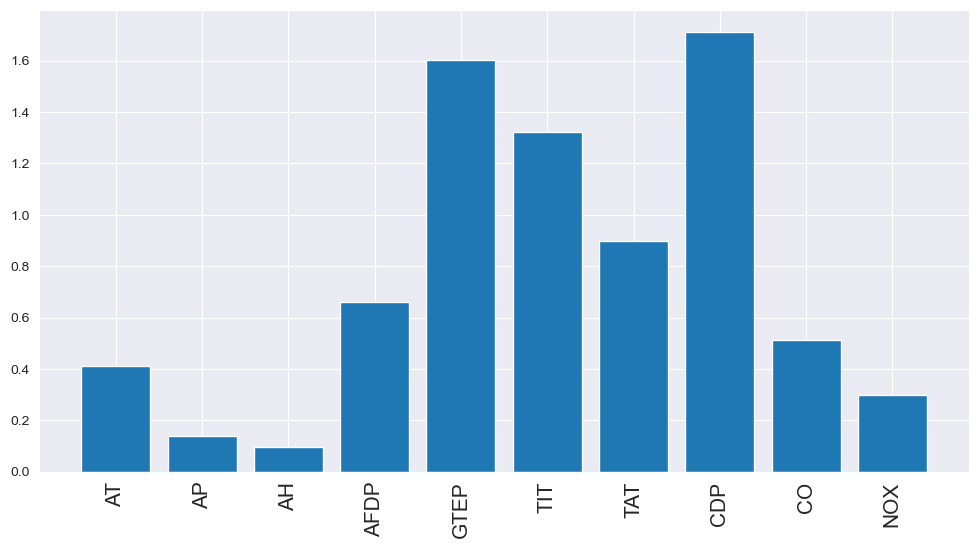

In [34]:
fig, axes = plt.subplots(figsize=(12,6))
plt.bar([i for i in range(len(scores))],scores)
axes.set_xticks([0,1,2,3,4,5,6,7,8,9])
axes.set_xticklabels(x.columns.values)
plt.xticks(rotation = 90, size = 15)
plt.show()

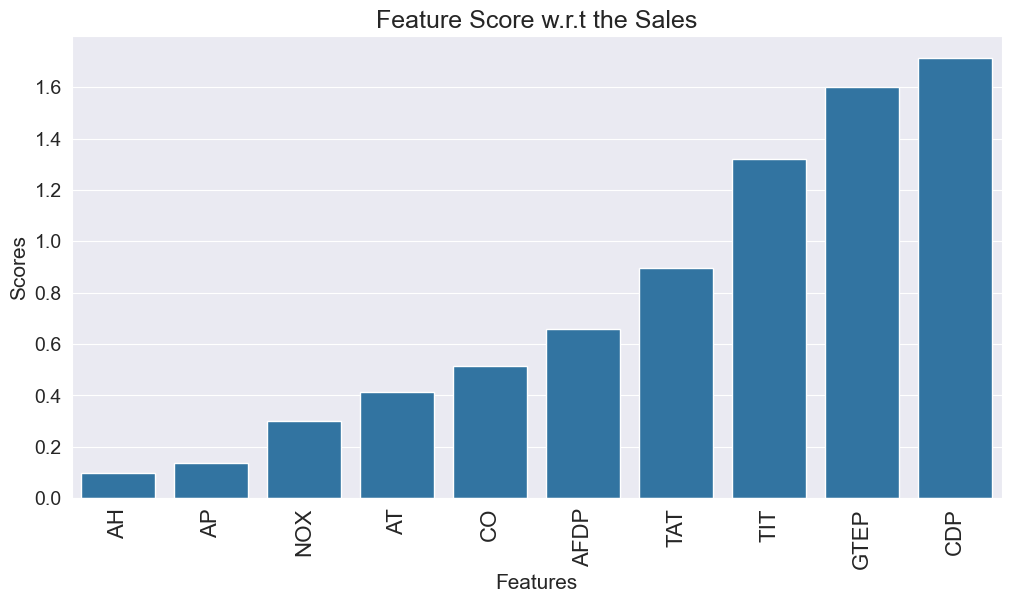

In [35]:
plt.figure(figsize=(12,6))
sns.barplot(x='Feature', y="Score", data=score_df, order=score_df.sort_values('Score').Feature)
plt.xlabel("Features", size=15)
plt.ylabel("Scores", size=15)
plt.yticks(rotation = 0, fontsize = 14)
plt.xticks(rotation = 90, fontsize = 16)
plt.title("Feature Score w.r.t the Sales", size=18)
plt.show()

In [36]:
score_df.sort_values('Score', ascending=False)


,Score,Feature
7,1.712805,CDP
4,1.600684,GTEP
5,1.322399,TIT
6,0.896557,TAT
3,0.660290,AFDP
8,0.513002,CO
0,0.411988,AT
9,0.300180,NOX
1,0.138986,AP
2,0.097819,AH


In [37]:
model_data = df[['CDP', 'GTEP','TIT', 'TAT', 'AFDP', 'CO', 'AT',"TEY"]]
model_data.head()

,CDP,GTEP,TIT,TAT,AFDP,CO,AT,TEY
0,10.605,19.663,1059.2,550.00,3.5000,3.1547,6.8594,114.70
1,10.598,19.728,1059.3,550.00,3.4998,3.2363,6.7850,114.72
2,10.601,19.779,1059.4,549.87,3.4824,3.2012,6.8977,114.71
3,10.606,19.792,1059.6,549.99,3.4805,3.1923,7.0569,114.72
4,10.612,19.765,1059.7,549.98,3.4976,3.2484,7.3978,114.72


In [38]:
# Applying Standard Scaler
continuous_feature=[feature for feature in model_data.columns if model_data[feature].dtype!='O']
print('Continuous Feature Count {}'.format(len(continuous_feature)))

Continuous Feature Count 8


In [39]:
df_standard_scaled = model_data.copy()
features = df_standard_scaled[continuous_feature]

In [40]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

df_standard_scaled[continuous_feature] = scaler.fit_transform(features.values)
df_standard_scaled.head()

,CDP,GTEP,TIT,TAT,AFDP,CO,AT,TEY
0,-1.357331,-1.379101,-1.488376,0.585240,-0.921232,0.532012,-1.439778,-1.231172
1,-1.363676,-1.363528,-1.482325,0.585240,-0.921495,0.568733,-1.449601,-1.229909
2,-1.360957,-1.351309,-1.476275,0.568715,-0.944385,0.552938,-1.434721,-1.230541
3,-1.356424,-1.348194,-1.464173,0.583969,-0.946884,0.548933,-1.413702,-1.229909
4,-1.350985,-1.354663,-1.458123,0.582698,-0.924389,0.574179,-1.368693,-1.229909


In [41]:
print('Mean' '\n',np.round(df_standard_scaled.mean(),1))


Mean
 CDP     0.0
GTEP   -0.0
TIT    -0.0
TAT     0.0
AFDP    0.0
CO      0.0
AT      0.0
TEY     0.0
dtype: float64


In [42]:
print('Standard Devaition','\n',np.round(df_standard_scaled.std(),1))


Standard Devaition 
 CDP     1.0
GTEP    1.0
TIT     1.0
TAT     1.0
AFDP    1.0
CO      1.0
AT      1.0
TEY     1.0
dtype: float64


In [43]:
# Test Train Split With Imbalanced Dataset
x = df_standard_scaled.drop('TEY',axis=1)
x

,CDP,GTEP,TIT,TAT,AFDP,CO,AT
0,-1.357331,-1.379101,-1.488376,0.585240,-0.921232,0.532012,-1.439778
1,-1.363676,-1.363528,-1.482325,0.585240,-0.921495,0.568733,-1.449601
2,-1.360957,-1.351309,-1.476275,0.568715,-0.944385,0.552938,-1.434721
3,-1.356424,-1.348194,-1.464173,0.583969,-0.946884,0.548933,-1.413702
4,-1.350985,-1.354663,-1.458123,0.582698,-0.924389,0.574179,-1.368693
...,...,...,...,...,...,...,...
15034,-1.543161,-1.498657,-2.063184,0.103453,-0.865850,1.145792,-1.153182
15035,-1.513247,-1.438759,-2.268905,-0.276638,-0.913470,1.293578,-1.303986
15036,-1.467922,-1.410967,-2.789257,-1.026650,-0.951488,2.695925,-1.386267
15037,-1.422598,-1.447624,-2.456474,-0.528337,-0.988848,1.924683,-1.420423


In [45]:
y = df_standard_scaled[['TEY']]
y

,TEY
0,-1.231172
1,-1.229909
2,-1.230541
3,-1.229909
4,-1.229909
...,...
15034,-1.426381
15035,-1.415642
15036,-1.516089
15037,-1.481343


In [46]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=3)


In [58]:
import keras
from keras.models import Sequential
from keras.layers import Dense
import keras
keras. __version__

'2.12.0'

In [59]:
# Hyperparameter Tuning
model_data
#assigning predictor variables to x and response variable to y
x = model_data.drop('TEY', axis=1)
y = model_data[["TEY"]]

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.20, random_state=42)

scaler_train = StandardScaler()
scaler_test = StandardScaler()

x_train_scaled = scaler_train.fit_transform(x_train) # scaling train data -- predictor
x_test_scaled  = scaler_test.fit_transform(x_test) # scaling test data -- predictor

print(x_train_scaled.shape)
print(x_test_scaled.shape)
print(y_train.shape)
print(y_test.shape)


(12031, 7)
(3008, 7)
(12031, 1)
(3008, 1)


In [64]:
# since we have continuous ouput, AF is not required in the o/p layer
model = Sequential()
model.add( Dense( units = 50 , activation = 'relu' , kernel_initializer = 'normal', input_dim = 7)) # input layer
model.add( Dense( units = 20 , activation = 'tanh' , kernel_initializer = 'normal' )) # hidden layer
model.add( Dense( units = 1  , kernel_initializer = 'normal' )) # o/p layer

model.compile(optimizer= "adam", loss="mse", metrics= ["mae", "mse"])
model.fit(x_train_scaled, y_train , batch_size=50, validation_split=0.3, epochs=100,  verbose=1)

Train on 8421 samples, validate on 3610 samples
Epoch 1/100
8421/8421 [==============================] - 1s 87us/sample - loss: 17631.1235 - mae: 131.8241 - mse: 17631.1250 - val_loss: 16785.0448 - val_mae: 128.5966 - val_mse: 16785.0449
Epoch 2/100
8421/8421 [==============================] - 1s 63us/sample - loss: 16287.7561 - mae: 126.6276 - mse: 16287.7549 - val_loss: 15730.5873 - val_mae: 124.4291 - val_mse: 15730.5869
Epoch 3/100
8421/8421 [==============================] - 1s 66us/sample - loss: 15311.9491 - mae: 122.7153 - mse: 15311.9463 - val_loss: 14812.1174 - val_mae: 120.6820 - val_mse: 14812.1162
Epoch 4/100
8421/8421 [==============================] - 1s 64us/sample - loss: 14427.2157 - mae: 119.0594 - mse: 14427.2129 - val_loss: 13959.6161 - val_mae: 117.0967 - val_mse: 13959.6143
Epoch 5/100
8421/8421 [==============================] - 1s 60us/sample - loss: 13598.4840 - mae: 115.5253 - mse: 13598.4834 - val_loss: 13155.3699 - val_mae: 113.6107 - val_mse: 13155.3682
Ep

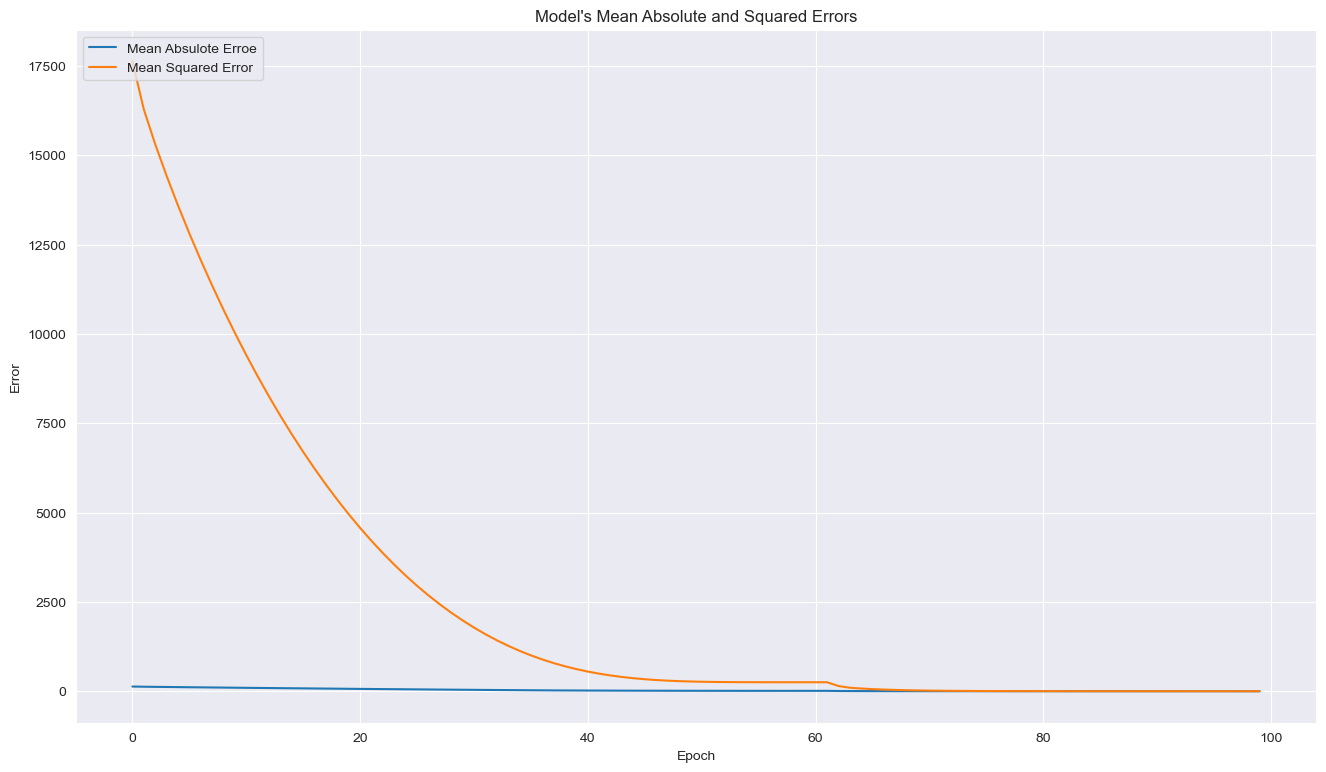

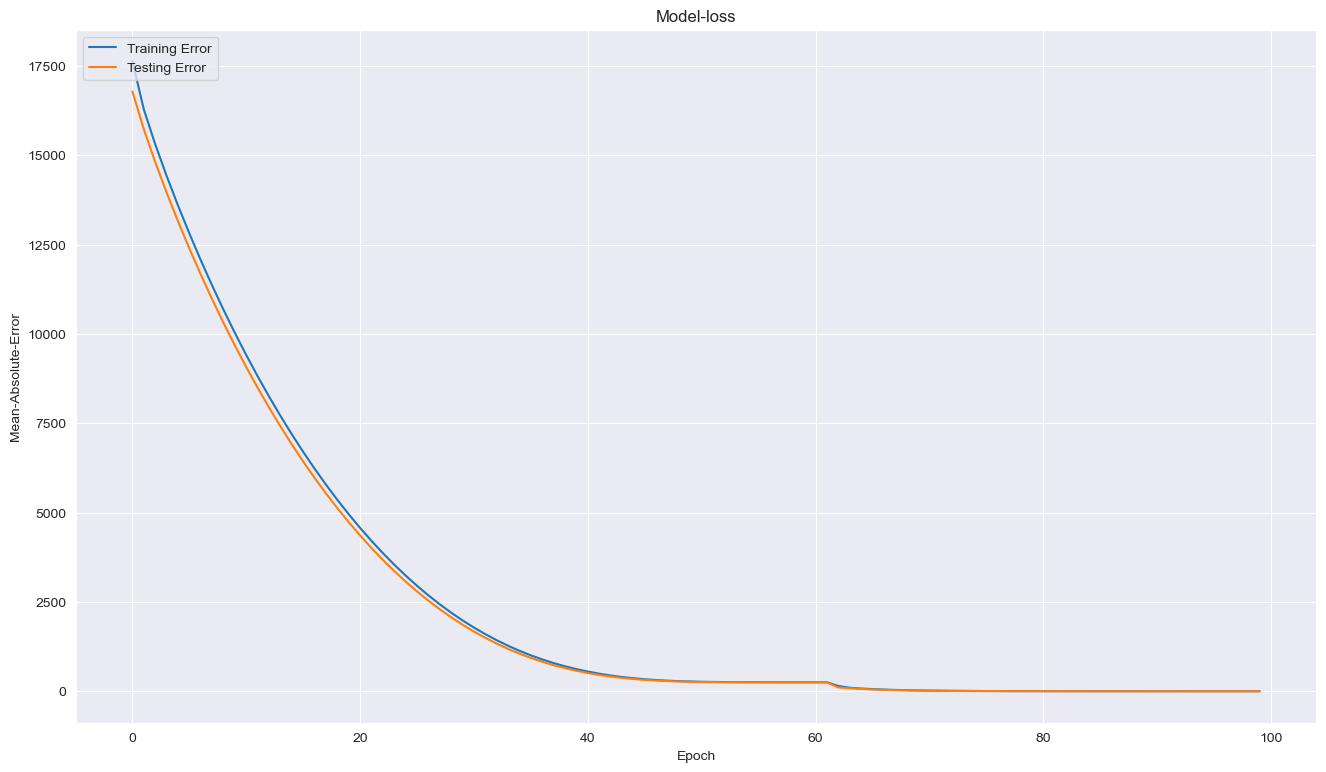

In [65]:
plt.figure(figsize=(16,9))
plt.plot(model.history.history['mae'])
plt.plot(model.history.history['mse'])
plt.title("Model's Mean Absolute and Squared Errors")
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.legend(['Mean Absulote Erroe', 'Mean Squared Error'],loc = 'upper left')
plt.show()
#summarize history for loss
plt.figure(figsize=(16,9))
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('Model-loss')
plt.xlabel('Epoch')
plt.ylabel('Mean-Absolute-Error')
plt.legend(['Training Error', 'Testing Error'],loc='upper left')
plt.show()

In [66]:
# generating predictions for test data
y_predict_test = model.predict(x_test_scaled)

# creating table with test price & predicted price for test
predictions_df = pd.DataFrame(x_test)
predictions_df['Actual'] = y_test
predictions_df['Predicted'] = y_predict_test
print(predictions_df.shape)
predictions_df.head(10)

(3008, 9)


,CDP,GTEP,TIT,TAT,AFDP,CO,AT,Actual,Predicted
13312,12.219,25.762,1092.5,550.25,4.0023,1.26430,24.0930,134.46,134.754883
12627,10.791,20.085,1059.6,549.94,3.2106,2.69370,20.4500,111.88,112.670578
6393,12.126,25.221,1089.9,549.62,4.5325,1.96250,20.2620,133.72,134.297577
4990,12.218,25.965,1092.9,549.96,4.4266,1.57120,26.8620,133.79,134.181564
12462,10.466,19.688,1056.9,550.01,3.1241,2.29960,19.4090,110.77,111.358704
7405,10.624,19.387,1058.9,550.17,3.3709,4.27640,2.2158,113.32,114.310112
10993,12.088,25.392,1089.7,550.11,3.7871,0.83578,23.8520,133.77,133.661575
9488,11.498,23.225,1079.4,549.60,4.2837,2.01980,12.3950,128.98,129.071808
14201,13.971,32.518,1100.1,528.98,5.1559,0.87760,12.3590,159.42,159.816528
9757,13.862,32.105,1100.0,530.69,5.9309,10.75000,8.6376,161.86,158.278687


In [67]:
# Computing the absolute percent error
APE=100*(abs(predictions_df['Actual']-predictions_df['Predicted'])/predictions_df['Actual'])
print('The Accuracy for Test Data -- ANN model = ', 100-np.mean(APE))

# adding absolute percent error to table
predictions_df['APE %']=APE
predictions_df.head()

The Accuracy for Test Data -- ANN model =  99.59406115154016


,CDP,GTEP,TIT,TAT,AFDP,CO,AT,Actual,Predicted,APE %
13312,12.219,25.762,1092.5,550.25,4.0023,1.2643,24.093,134.46,134.754883,0.219309
12627,10.791,20.085,1059.6,549.94,3.2106,2.6937,20.450,111.88,112.670578,0.706630
6393,12.126,25.221,1089.9,549.62,4.5325,1.9625,20.262,133.72,134.297577,0.431930
4990,12.218,25.965,1092.9,549.96,4.4266,1.5712,26.862,133.79,134.181564,0.292671
12462,10.466,19.688,1056.9,550.01,3.1241,2.2996,19.409,110.77,111.358704,0.531465


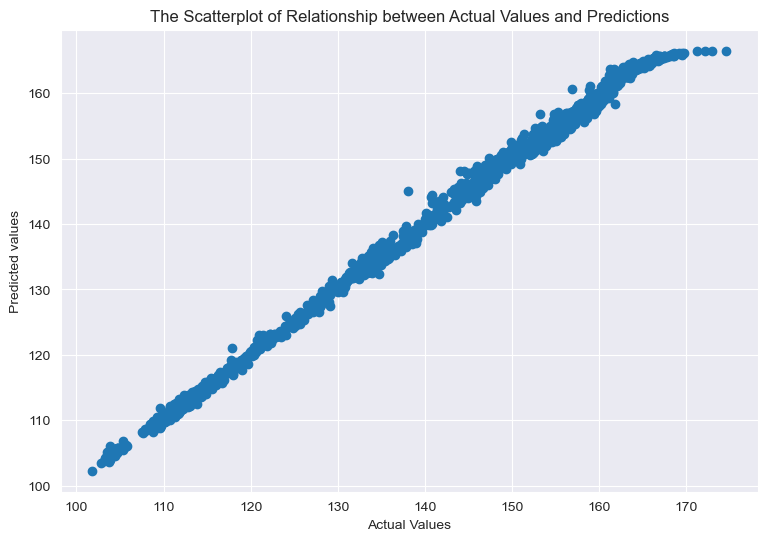

In [68]:
# Visualizing the Relationship between the Actual and Predicted ValuesModel Validation
plt.figure(figsize=(9,6))
plt.xlabel("Actual Values")
plt.ylabel("Predicted values")
plt.title("The Scatterplot of Relationship between Actual Values and Predictions")
plt.scatter(predictions_df['Actual'], predictions_df['Predicted'])

In [69]:
predictions_df['Error'] = (predictions_df['Actual'] - predictions_df['Predicted'])/(predictions_df['Actual'])
predictions_df.reset_index(drop = True)

,CDP,GTEP,TIT,TAT,AFDP,CO,AT,Actual,Predicted,APE %,Error
0,12.219,25.762,1092.5,550.25,4.0023,1.26430,24.093,134.46,134.754883,0.219309,-0.002193
1,10.791,20.085,1059.6,549.94,3.2106,2.69370,20.450,111.88,112.670578,0.706630,-0.007066
2,12.126,25.221,1089.9,549.62,4.5325,1.96250,20.262,133.72,134.297577,0.431930,-0.004319
3,12.218,25.965,1092.9,549.96,4.4266,1.57120,26.862,133.79,134.181564,0.292671,-0.002927
4,10.466,19.688,1056.9,550.01,3.1241,2.29960,19.409,110.77,111.358704,0.531465,-0.005315
...,...,...,...,...,...,...,...,...,...,...,...
3003,11.083,21.936,1069.6,549.87,3.3145,1.42310,21.692,119.25,119.453255,0.170444,-0.001704
3004,12.205,25.864,1093.6,550.41,4.0224,0.78249,27.200,133.74,134.332138,0.442753,-0.004428
3005,13.081,29.741,1099.5,541.25,4.7190,1.64630,29.073,146.31,146.834808,0.358696,-0.003587
3006,13.311,30.052,1099.9,538.12,4.8017,0.84607,23.404,150.07,150.068359,0.001093,0.000011


<Axes: ylabel='Density'>

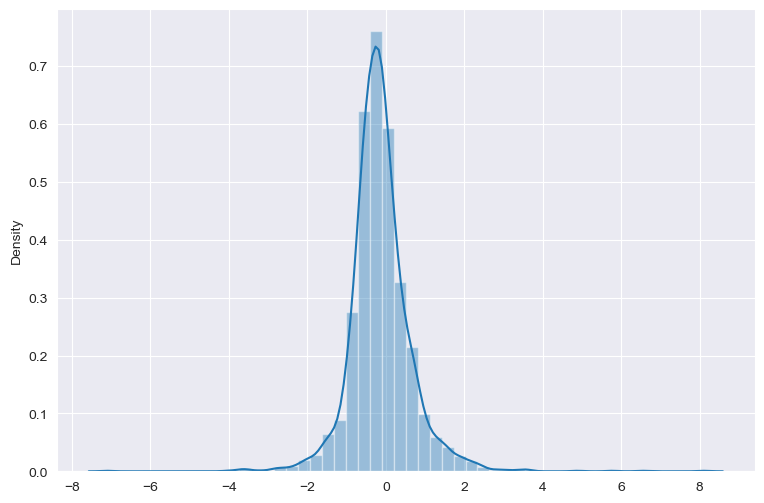

In [70]:
# Residual Analysis
# Now we will visualize the differences between our predictions and actual y test data
plt.figure(figsize=(9,6))
sns.distplot(y_test-y_predict_test,bins=50) # this figure also proves that our model fits very good

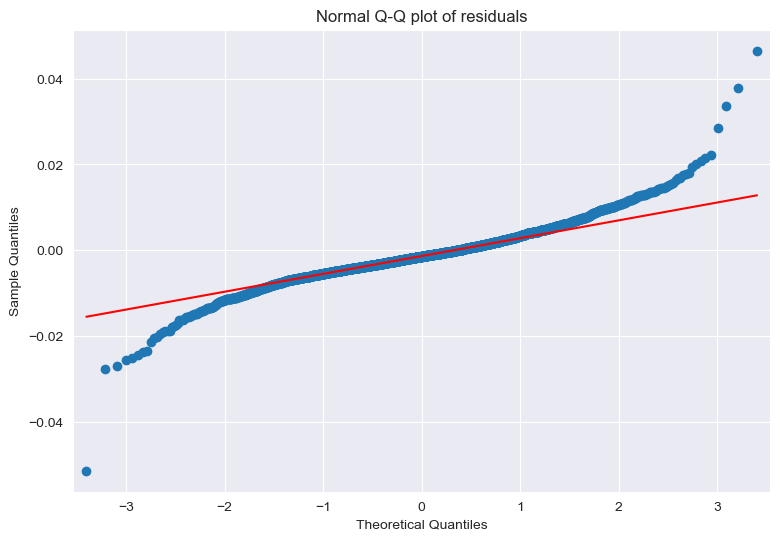

In [71]:
# #Residuals values  = y - yhat

import statsmodels.api as smf
plt.rcParams["figure.figsize"] = (9,6)
smf.qqplot(predictions_df['Error'], line= 'q')
plt.title('Normal Q-Q plot of residuals')
plt.show()
